In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import netCDF4 as nc
import xarray as xr
import scipy.ndimage
import scipy as sp
import alphashape
from scipy import interpolate
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from matplotlib import style
from pathlib import Path  
style.use('ggplot') or plt.style.use('ggplot')


In [2]:
# Read in the observed stratigraphy data

radardata = {}
for i in range(1,8):
    radardata['data' + str(i)] = pd.read_csv('../Data/AdjustedRadarStatigraphy/Observed/RadarSegment' + str(i) + '.csv', sep=",")
radardata

{'data1':       index        psX        psY   base  IRH0    Surface  StratElev1  \
 0         0  961154.51  1956754.7  178.2     0   7.360430         NaN   
 1         1  961159.69  1956751.7  178.4     0   7.700226         NaN   
 2         2  961164.87  1956748.6  178.7     0   8.049260         NaN   
 3         3  961170.05  1956745.6  178.7     0   8.401228         NaN   
 4         4  961175.23  1956742.5  179.1     0   8.762635         NaN   
 ...     ...        ...        ...    ...   ...        ...         ...   
 5195   5195  987891.95  1940631.6  321.8     0  33.207766   28.802378   
 5196   5196  987896.27  1940627.4  321.8     0  33.209596   28.603297   
 5197   5197  987900.59  1940623.3  321.8     0  33.211438   28.605139   
 5198   5198  987904.90  1940619.1  321.8     0  33.213361   28.607061   
 5199   5199  987909.22  1940614.9  321.8     0  33.215331   28.609032   
 
       StratElev2  StratElev3  StratElev4  StratElev5  StratElev6  StratElev7  \
 0            NaN   

In [3]:
# Read in the full radar lines

dataXY = pd.read_csv('../Data/AdjustedRadarStatigraphy/DepthAdjustedStratigraphyElevation.csv', sep=",")

# Record the corss-section index ranges

CSs = {'CS1' : [0, 5200], 'CS2' : [6200, 12000], 'CS3' : [12100, 15500], 'CS4' : [17500, 22700], \
       'CS5' : [25000, 32500], 'CS6' : [32700, 40000], 'CS7' : [41700, 51500]}


In [4]:
# Read in GL data

dfGL = pd.read_csv("/Users/clara.henry/Documents/Derwael/Data/GroundingLine.csv")

points = np.column_stack((list(dfGL["Points:0"])[::10], list(dfGL["Points:1"])[::10]))

# [list(dfGL["Points:0"]), list(dfGL["Points:1"])]
alpha = 0.95 * alphashape.optimizealpha(points)
hull = alphashape.alphashape(points, alpha)
hull_pts = hull.exterior.coords.xy

hull_pts = hull_pts

for i in range(len(hull_pts[0])):
    hull_pts[0][i] = hull_pts[0][i]/1000
    hull_pts[1][i] = hull_pts[1][i]/1000


/Users/clara.henry/opt/anaconda3/lib/python3.9/site-packages/shapely/ops.py:42: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  source = iter(source)
/Users/clara.henry/opt/anaconda3/lib/python3.9/site-packages/alphashape/optimizealpha.py:41: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return all([polygon.intersects(point) for point in points])


In [5]:
# Define the ages

ages = [0.00001, 10, 20, 40, 80, 160, 320, 640, 1280, 5120]
#ages = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700]


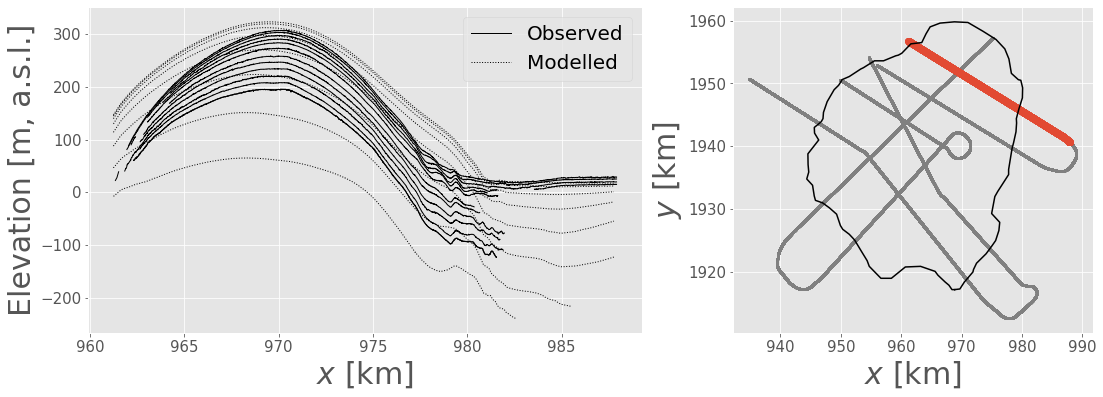

In [6]:
# Plot the first set of data

fig, ax = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [2, 1.3]})
for i in range(1,13):
    ax[0].plot(radardata['data1']['psX']/1000, radardata['data1']['StratElev' + str(i)], color='black', linewidth=1)
ax[0].plot(radardata['data1']['psX']/1000, radardata['data1']['StratElev' + str(i)], color='black', linewidth=1, label = 'Observed')
    
for i in ages:
    data = pd.read_csv('../Simulations/DerwaelSimulations/Contours/n3E0.4/ModelledSegment1.csv', sep=",")
    df = data.loc[data['age'] == i]
    df = df.sort_values(by='Points:0')
    ax[0].plot(df['Points:0']/1000, df['Points:2'], color='black', linestyle='dotted', linewidth=1)
ax[0].plot(df['Points:0']/1000, df['Points:2'], color='black', linestyle='dotted', linewidth=1, label = 'Modelled')
# Plot the radar lines in the horizontal    

i = 1
    
ax[1].scatter(dataXY['psX']/1000, dataXY['psY']/1000, s=5, color='grey')
ax[1].scatter(dataXY['psX'][CSs['CS' + str(i)][0]:CSs['CS' + str(i)][1]]/1000, dataXY['psY'][CSs['CS' + str(i)][0]:CSs['CS' + str(i)][1]]/1000)
ax[1].plot(hull_pts[0], hull_pts[1], color='black')

ax[0].set_xlabel('$x$ [km]', fontsize = 30)
ax[0].set_ylabel('Elevation [m, a.s.l.]', fontsize = 30)
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize = 20)
ax[1].set_xlabel('$x$ [km]', fontsize = 30)
ax[1].set_ylabel('$y$ [km]', fontsize = 30)
ax[1].tick_params(axis='both', which='major', labelsize=15)

fig.savefig('../Figures/StratigraphyComparison/StratigraphyComparison' + str(i) + '.jpg', format='jpg', dpi=700, bbox_inches = "tight")


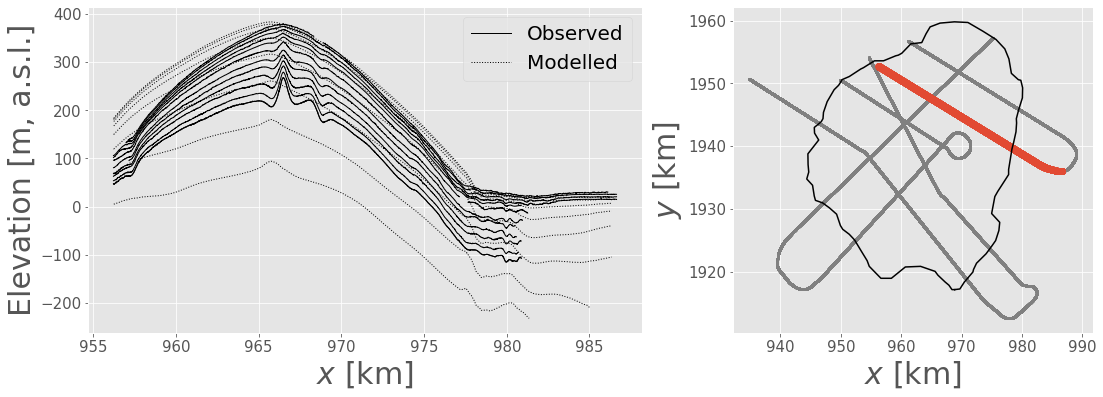

In [8]:
# Plot the second set of data

fig, ax = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [2, 1.3]})
for i in range(1,13):
    ax[0].plot(radardata['data2']['psX']/1000, radardata['data2']['StratElev' + str(i)], color='black', linewidth=1)
ax[0].plot(radardata['data2']['psX']/1000, radardata['data2']['StratElev' + str(i)], color='black', linewidth=1, label = 'Observed')

for i in ages:
    data = pd.read_csv('../Simulations/DerwaelSimulations/Contours/n3E0.4/ModelledSegment2.csv', sep=",")
    df = data.loc[data['age'] == i]
    df = df.sort_values(by='Points:0')
    ax[0].plot(df['Points:0']/1000, df['Points:2'], color='black', linestyle='dotted', linewidth=1)
ax[0].plot(df['Points:0']/1000, df['Points:2'], color='black', linestyle='dotted', linewidth=1, label = 'Modelled')
# Plot the radar lines in the horizontal

i = 2
    
ax[1].scatter(dataXY['psX']/1000, dataXY['psY']/1000, s=5, color='grey')
ax[1].scatter(dataXY['psX'][CSs['CS' + str(i)][0]:CSs['CS' + str(i)][1]]/1000, dataXY['psY'][CSs['CS' + str(i)][0]:CSs['CS' + str(i)][1]]/1000)
ax[1].plot(hull_pts[0], hull_pts[1], color='black')

ax[0].set_xlabel('$x$ [km]', fontsize = 30)
ax[0].set_ylabel('Elevation [m, a.s.l.]', fontsize = 30)
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize = 20)
ax[1].set_xlabel('$x$ [km]', fontsize = 30)
ax[1].set_ylabel('$y$ [km]', fontsize = 30)
ax[1].tick_params(axis='both', which='major', labelsize=15)

fig.savefig('../Figures/StratigraphyComparison/StratigraphyComparison' + str(i) + '.jpg', format='jpg', dpi=700, bbox_inches = "tight")


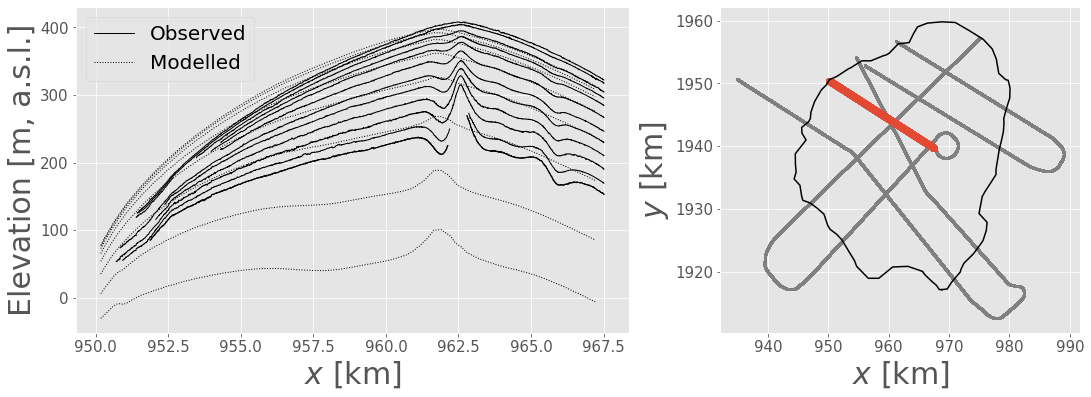

In [10]:
# Plot the third set of data

fig, ax = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [2, 1.3]})
for i in range(1,13):
    ax[0].plot(radardata['data3']['psX']/1000, radardata['data3']['StratElev' + str(i)], color='black', linewidth=1)
ax[0].plot(radardata['data3']['psX']/1000, radardata['data3']['StratElev' + str(i)], color='black', linewidth=1, label = 'Observed')

for i in ages:
    data = pd.read_csv('../Simulations/DerwaelSimulations/Contours/n3E0.4/ModelledSegment3.csv', sep=",")
    df = data.loc[data['age'] == i]
    df = df.sort_values(by='Points:0')
    ax[0].plot(df['Points:0']/1000, df['Points:2'], color='black', linestyle='dotted', linewidth=1)
ax[0].plot(df['Points:0']/1000, df['Points:2'], color='black', linestyle='dotted', linewidth=1, label = 'Modelled')

# Plot the radar lines in the horizontal

i = 3
    
ax[1].scatter(dataXY['psX']/1000, dataXY['psY']/1000, s=5, color='grey')
ax[1].scatter(dataXY['psX'][CSs['CS' + str(i)][0]:CSs['CS' + str(i)][1]]/1000, dataXY['psY'][CSs['CS' + str(i)][0]:CSs['CS' + str(i)][1]]/1000)
ax[1].plot(hull_pts[0], hull_pts[1], color='black')

ax[0].set_xlabel('$x$ [km]', fontsize = 30)
ax[0].set_ylabel('Elevation [m, a.s.l.]', fontsize = 30)
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize = 20)
ax[1].set_xlabel('$x$ [km]', fontsize = 30)
ax[1].set_ylabel('$y$ [km]', fontsize = 30)
ax[1].tick_params(axis='both', which='major', labelsize=15)

fig.savefig('../Figures/StratigraphyComparison/StratigraphyComparison' + str(i) + '.jpg', format='jpg', dpi=700, bbox_inches = "tight")


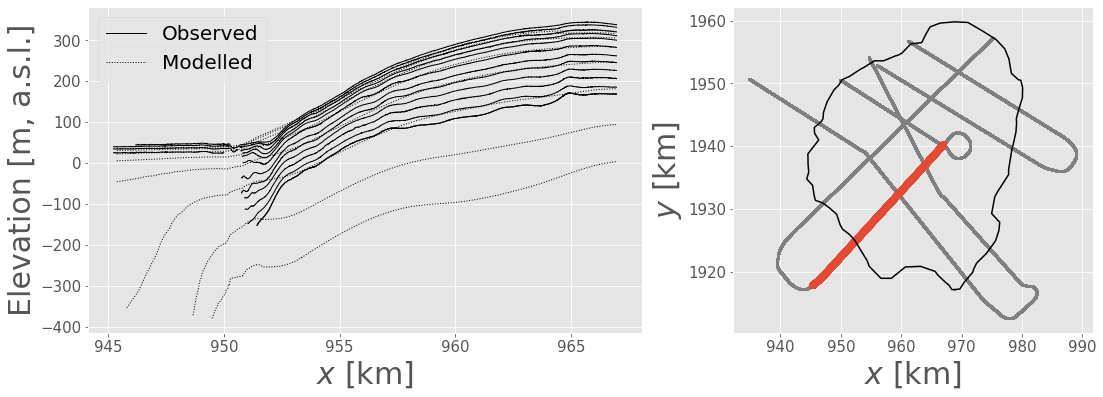

In [11]:
# Plot the fourth set of data

fig, ax = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [2, 1.3]})
for i in range(1,13):
    ax[0].plot(radardata['data4']['psX']/1000, radardata['data4']['StratElev' + str(i)], color='black', linewidth=1)
ax[0].plot(radardata['data4']['psX']/1000, radardata['data4']['StratElev' + str(i)], color='black', linewidth=1, label = 'Observed')

for i in ages:
    data = pd.read_csv('../Simulations/DerwaelSimulations/Contours/n3E0.4/ModelledSegment4.csv', sep=",")
    df = data.loc[data['age'] == i]
    df = df.sort_values(by='Points:0')
    ax[0].plot(df['Points:0']/1000, df['Points:2'], color='black', linestyle='dotted', linewidth=1)
ax[0].plot(df['Points:0']/1000, df['Points:2'], color='black', linestyle='dotted', linewidth=1, label = 'Modelled')

# Plot the radar lines in the horizontal

i = 4
    
ax[1].scatter(dataXY['psX']/1000, dataXY['psY']/1000, s=5, color='grey')
ax[1].scatter(dataXY['psX'][CSs['CS' + str(i)][0]:CSs['CS' + str(i)][1]]/1000, dataXY['psY'][CSs['CS' + str(i)][0]:CSs['CS' + str(i)][1]]/1000)
ax[1].plot(hull_pts[0], hull_pts[1], color='black')      

ax[0].set_xlabel('$x$ [km]', fontsize = 30)
ax[0].set_ylabel('Elevation [m, a.s.l.]', fontsize = 30)
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize = 20)
ax[1].set_xlabel('$x$ [km]', fontsize = 30)
ax[1].set_ylabel('$y$ [km]', fontsize = 30)
ax[1].tick_params(axis='both', which='major', labelsize=15)

fig.savefig('../Figures/StratigraphyComparison/StratigraphyComparison' + str(i) + '.jpg', format='jpg', dpi=700, bbox_inches = "tight")


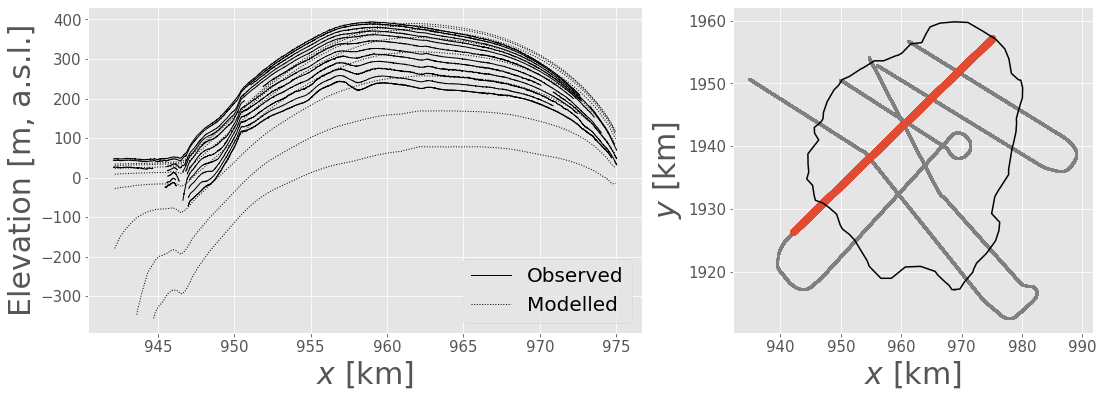

In [12]:
# Plot the fifth set of data

fig, ax = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [2, 1.3]})
for i in range(1,13):
    ax[0].plot(radardata['data5']['psX']/1000, radardata['data5']['StratElev' + str(i)], color='black', linewidth=1)
ax[0].plot(radardata['data5']['psX']/1000, radardata['data5']['StratElev' + str(i)], color='black', linewidth=1, label = 'Observed')

for i in ages:
    data = pd.read_csv('../Simulations/DerwaelSimulations/Contours/n3E0.4/ModelledSegment5.csv', sep=",")
    df = data.loc[data['age'] == i]
    df = df.sort_values(by='Points:0')
    ax[0].plot(df['Points:0']/1000, df['Points:2'], color='black', linestyle='dotted', linewidth=1)
ax[0].plot(df['Points:0']/1000, df['Points:2'], color='black', linestyle='dotted', linewidth=1, label = 'Modelled')

# Plot the radar lines in the horizontal

i = 5
    
ax[1].scatter(dataXY['psX']/1000, dataXY['psY']/1000, s=5, color='grey')
ax[1].scatter(dataXY['psX'][CSs['CS' + str(i)][0]:CSs['CS' + str(i)][1]]/1000, dataXY['psY'][CSs['CS' + str(i)][0]:CSs['CS' + str(i)][1]]/1000)
ax[1].plot(hull_pts[0], hull_pts[1], color='black')    
    
ax[0].set_xlabel('$x$ [km]', fontsize = 30)
ax[0].set_ylabel('Elevation [m, a.s.l.]', fontsize = 30)
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize = 20)
ax[1].set_xlabel('$x$ [km]', fontsize = 30)
ax[1].set_ylabel('$y$ [km]', fontsize = 30)
ax[1].tick_params(axis='both', which='major', labelsize=15)

fig.savefig('../Figures/StratigraphyComparison/StratigraphyComparison' + str(i) + '.jpg', format='jpg', dpi=700, bbox_inches = "tight")


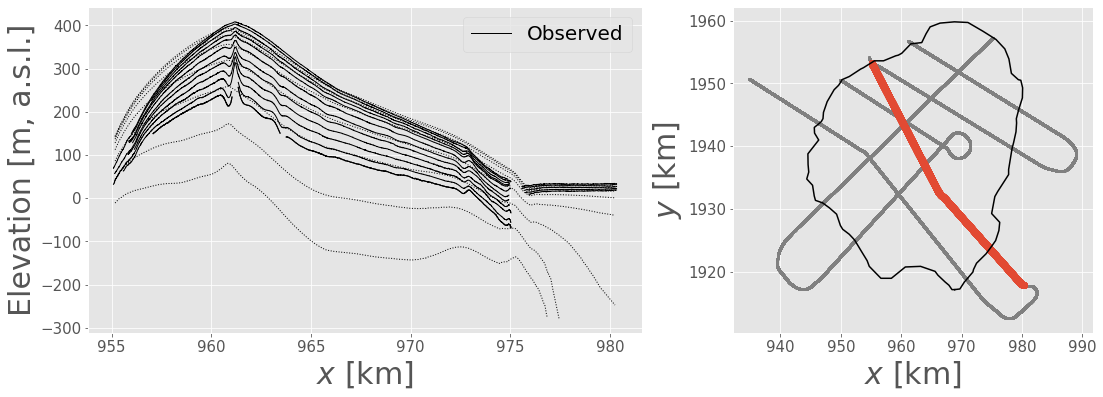

In [13]:
# Plot the sixth set of data

fig, ax = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [2, 1.3]})
for i in range(1,13):
    ax[0].plot(radardata['data6']['psX']/1000, radardata['data6']['StratElev' + str(i)], color='black', linewidth=1)
ax[0].plot(radardata['data6']['psX']/1000, radardata['data6']['StratElev' + str(i)], color='black', linewidth=1, label = 'Observed')

    
for i in ages:
    data = pd.read_csv('../Simulations/DerwaelSimulations/Contours/n3E0.4/ModelledSegment6.csv', sep=",")
    df = data.loc[data['age'] == i]
    df = df.sort_values(by='Points:0')
    ax[0].plot(df['Points:0']/1000, df['Points:2'], color='black', linestyle='dotted', linewidth=1)
ax[0].plot(df['Points:0']/1000, df['Points:2'], color='black', linestyle='dotted', linewidth=1)
#ax[0].plot(df['Points:0']/1000, df['Points:2'], color='black', linestyle='dotted', linewidth=1, label = 'Modelled')

# Plot the radar lines in the horizontal

i = 6
    
ax[1].scatter(dataXY['psX']/1000, dataXY['psY']/1000, s=5, color='grey')
ax[1].scatter(dataXY['psX'][CSs['CS' + str(i)][0]:CSs['CS' + str(i)][1]]/1000, dataXY['psY'][CSs['CS' + str(i)][0]:CSs['CS' + str(i)][1]]/1000)
ax[1].plot(hull_pts[0], hull_pts[1], color='black')

ax[0].set_xlabel('$x$ [km]', fontsize = 30)
ax[0].set_ylabel('Elevation [m, a.s.l.]', fontsize = 30)
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize = 20)
ax[1].set_xlabel('$x$ [km]', fontsize = 30)
ax[1].set_ylabel('$y$ [km]', fontsize = 30)
ax[1].tick_params(axis='both', which='major', labelsize=15)

fig.savefig('../Figures/StratigraphyComparison/StratigraphyComparison' + str(i) + '.jpg', format='jpg', dpi=700, bbox_inches = "tight")


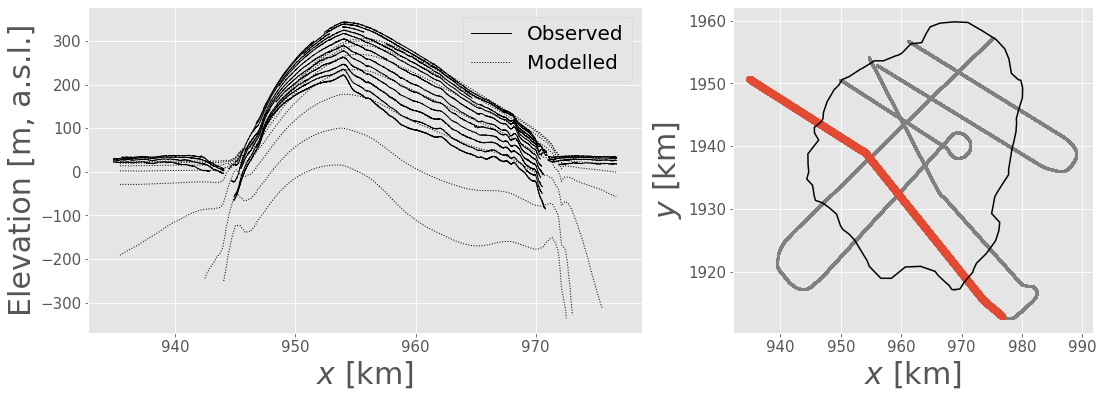

In [14]:
# Plot the seventh set of data

fig, ax = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [2, 1.3]})
for i in range(1,13):
    ax[0].plot(radardata['data7']['psX']/1000, radardata['data7']['StratElev' + str(i)], color='black', linewidth=1)
ax[0].plot(radardata['data7']['psX']/1000, radardata['data7']['StratElev' + str(i)], color='black', linewidth=1, label = 'Observed')
    
for i in ages:
    data = pd.read_csv('../Simulations/DerwaelSimulations/Contours/n3E0.4/ModelledSegment7.csv', sep=",")
    df = data.loc[data['age'] == i]
    df = df.sort_values(by='Points:0')
    ax[0].plot(df['Points:0']/1000, df['Points:2'], color='black', linestyle='dotted', linewidth=1)
ax[0].plot(df['Points:0']/1000, df['Points:2'], color='black', linestyle='dotted', linewidth=1, label = 'Modelled')

# Plot the radar lines in the horizontal

i = 7
    
ax[1].scatter(dataXY['psX']/1000, dataXY['psY']/1000, s=5, color='grey')
ax[1].scatter(dataXY['psX'][CSs['CS' + str(i)][0]:CSs['CS' + str(i)][1]]/1000, dataXY['psY'][CSs['CS' + str(i)][0]:CSs['CS' + str(i)][1]]/1000)
ax[1].plot(hull_pts[0], hull_pts[1], color='black')   

ax[0].set_xlabel('$x$ [km]', fontsize = 30)
ax[0].set_ylabel('Elevation [m, a.s.l.]', fontsize = 30)
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize = 20)
ax[1].set_xlabel('$x$ [km]', fontsize = 30)
ax[1].set_ylabel('$y$ [km]', fontsize = 30)
ax[1].tick_params(axis='both', which='major', labelsize=15)

fig.savefig('../Figures/StratigraphyComparison/StratigraphyComparison' + str(i) + '.jpg', format='jpg', dpi=700, bbox_inches = "tight")
